## 4.6.1 The Stock Market Data

In [1]:
library(ISLR)

In [2]:
smarket <- Smarket

In [3]:
names(smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [4]:
dim(smarket)

[1] 1250    9

In [5]:
summary(smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [7]:
cor(smarket[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


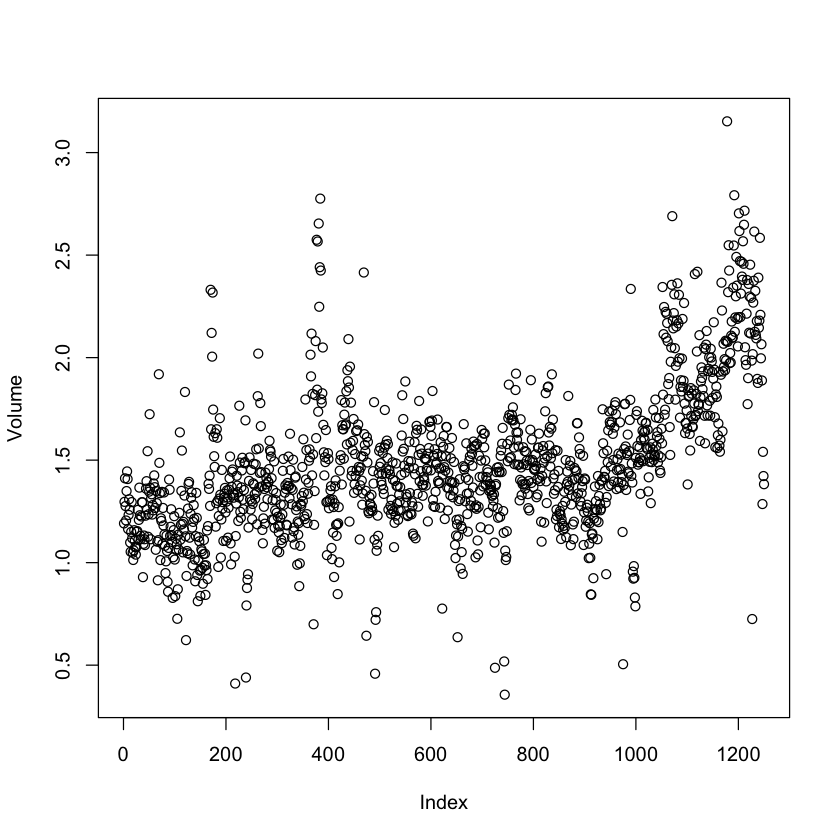

In [8]:
attach(smarket)
plot(Volume)

## 4.6.2 Logistic Regression

In [9]:
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, family=binomial)

In [10]:
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [11]:
coef(glm.fit)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [13]:
summary(glm.fit)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


In [14]:
glm.probs <- predict(glm.fit, type="response")
glm.probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [16]:
# create a vector of class predictions based on whether the predicted probability of a market increase is 
# greater than or less than 0.5
glm.pred <- rep("Down", 1250) # creates a vector of 1250 Down elements
glm.pred[glm.probs > .5] = "Up" # Transforms to Up all elements w pred prob > .5

In [17]:
# create a confusion matrix where the off-diagonals represent incorrect predictions
table(glm.pred, Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [18]:
(507+145)/1250

[1] 0.5216

In [19]:
mean(glm.pred==Direction)

[1] 0.5216

In [20]:
# the above numbers reflet only the training error rate - let's now calculate the test training rate
# create a vector corresponding to the observations from 2001 through 2004. 
# we will then use this vector to create a held out data set of observations from 2005.
train <- (Year<2005)
smarket.2005 <- smarket[!train,]
dim(smarket.2005)

[1] 252   9

In [21]:
# create test responses
Direction.2005 <- Direction[!train]

In [22]:
# fit log reg using only the subset of observations corresponding to dates before 2005
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, family=binomial, subset=train)
glm.probs <- predict(glm.fit, smarket.2005, type="response")

In [24]:
# now compute predictions from 2005 and compare them to the actual movements of the market over that time period.
glm.pred <- rep("Down", 252)
glm.pred[glm.probs > 0.5] = "Up"
table(glm.pred, Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

In [25]:
mean(glm.pred==Direction.2005)

[1] 0.4801587

In [26]:
mean(glm.pred!=Direction.2005) # test error rate

[1] 0.5198413

In [27]:
# let's try predicting Direction using only the most statistically significant predictors
glm.fit <- glm(Direction~Lag1+Lag2, family=binomial, subset=train)
glm.probs <- predict(glm.fit, smarket.2005, type="response")

In [28]:
glm.pred <- rep("Down", 252)
glm.pred[glm.probs>0.5] = "Up"
table(glm.pred, Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

In [29]:
mean(glm.pred==Direction.2005)

[1] 0.5595238

In [30]:
mean(glm.pred!=Direction.2005) # new test error rate

[1] 0.4404762

In [31]:
# insert comment
predict(glm.fit, newdata=data.frame(Lag1=c(1.2, 1.5), Lag2=c(1.1, -0.8)), type="response")

1         2 
0.4791462 0.4960939